## Importing necessary packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning and EDA

In [3]:
cardio=pd.read_excel('cardio.xlsx',index_col=0)

In [4]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0


In [5]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205543,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395829,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cardio.shape

(70000, 12)

## Data description
**There are 3 types of input features:**

**Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.**

**Features:**

**Age** | Objective Feature | **age** | int (days)

**Height** | Objective Feature | **height** | int (cm) |

**Weight** | Objective Feature | **weight** | float (kg) |

**Gender** | Objective Feature | **gender** | categorical code |

**Systolic blood pressure** | Examination Feature | **ap_hi** | int |

**Diastolic blood pressure** | Examination Feature | **ap_lo** | int |

**Cholesterol** | Examination Feature | **cholesterol** | 1: normal, 2: above normal, 3: well above normal |

**Glucose** | Examination Feature | **gluc** | 1: normal, 2: above normal, 3: well above normal |

**Smoking** | Subjective Feature | **smoke** | binary |

**Alcohol intake** | Subjective Feature | **alco** | binary |

**Physical activity** | Subjective Feature | **active** | binary |

**Presence or absence of cardiovascular disease** | Target Variable | **cardio** | binary |

All of the dataset values were collected at the moment of medical examination.

In [7]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          70000 non-null  int64
 1   gender       70000 non-null  int64
 2   height       70000 non-null  int64
 3   weight       70000 non-null  int64
 4   ap_hi        70000 non-null  int64
 5   ap_lo        70000 non-null  int64
 6   cholesterol  70000 non-null  int64
 7   gluc         70000 non-null  int64
 8   smoke        70000 non-null  int64
 9   alco         70000 non-null  int64
 10  active       70000 non-null  int64
 11  cardio       70000 non-null  int64
dtypes: int64(12)
memory usage: 6.9 MB


**Checking the Missing Values**

In [8]:
cardio.isnull().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

**Finding the duplicated values**

In [9]:
print("There are {} duplicated values in data frame".format(cardio.duplicated().sum()))

There are 24 duplicated values in data frame


**Displaying the duplicated values**

In [10]:
duplicated = cardio[cardio.duplicated(keep=False)]
duplicated

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
1585,17493,2,169,74,120,80,1,1,0,0,1,1
1685,16793,1,165,68,120,80,1,1,0,0,1,0
2223,21945,1,165,60,120,80,1,1,0,0,1,0
2283,20293,1,162,70,110,70,1,1,0,0,1,0
3247,20495,1,165,70,120,80,1,1,0,0,1,0
3774,22077,1,175,69,120,80,1,1,0,0,1,1
9004,14552,1,158,64,120,80,1,1,0,0,1,0
11684,21778,1,160,58,120,80,1,1,0,0,1,0
14974,16937,2,170,70,120,80,1,1,0,0,0,0


In [11]:
cardio.drop_duplicates(inplace=True)


print("There is {} duplicated values in data frame".format(cardio.duplicated().sum()))

There is 0 duplicated values in data frame


In [12]:
cardio.shape

(69976, 12)

## Multivariate analysis

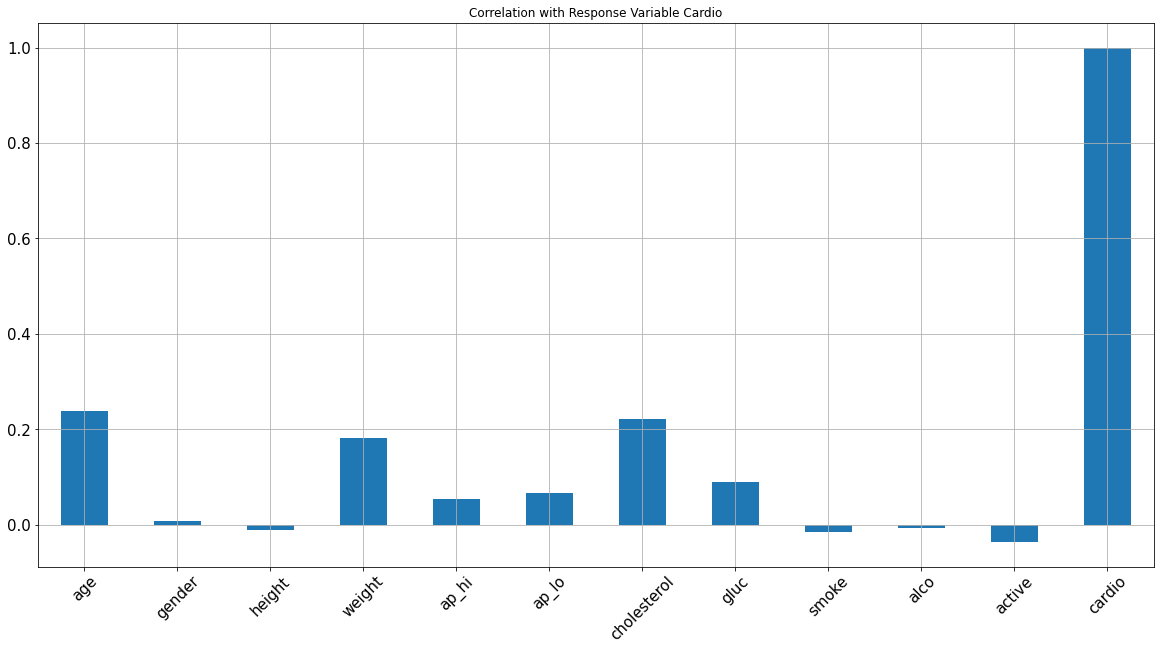

In [13]:
cardio.corrwith(cardio.cardio).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable Cardio', 
                                   fontsize = 15, rot = 45, grid = True)

**Correlation matrix**

(12.5, -0.5)

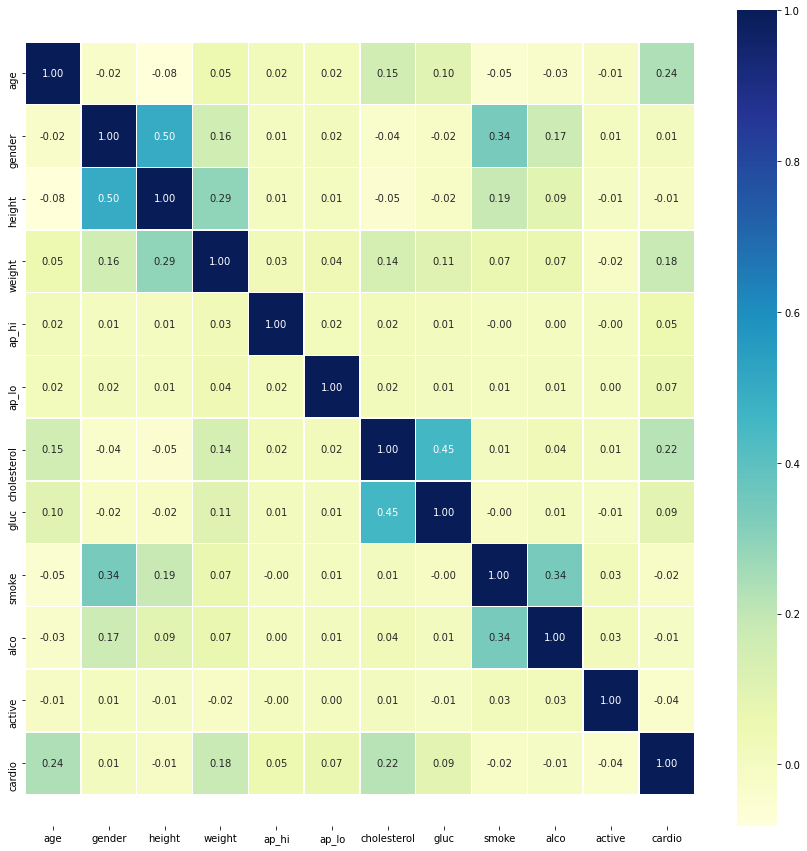

In [14]:
corr_matrix = cardio.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

****Preparing feature and target data****

In [15]:
X=cardio.iloc[:,0:11]

In [16]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,18393,2,168,62,110,80,1,1,0,0,1
1,20228,1,156,85,140,90,3,1,0,0,1
2,18857,1,165,64,130,70,3,1,0,0,0
3,17623,2,169,82,150,100,1,1,0,0,1
4,17474,1,156,56,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76,120,80,1,1,1,0,1
99995,22601,1,158,126,140,90,2,2,0,0,1
99996,19066,2,183,105,180,90,3,1,0,1,0


In [17]:
X.shape

(69976, 11)

In [18]:
y=cardio.iloc[:,11]

In [19]:
y

id
0        0
1        1
2        1
3        1
4        0
        ..
99993    0
99995    1
99996    1
99998    1
99999    0
Name: cardio, Length: 69976, dtype: int64

In [20]:
y.shape

(69976,)

****Splitting the data into training and testing set****

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=0)

**Scaling**

In [22]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()                         
scaler.fit(X_train)                         
#here we fit the training data using MinMaxScaler().                   
X_train = scaler.transform(X_train)   
#here we have scaled the training data using the transform() and stored it in a variable named X_train_scaled.

In [23]:
X_test = scaler.transform(X_test) 
#here we have scaled the testing data using the transform() and stored it in a variable named X_test_scaled.

**XGBoost Classifier**

In [24]:
from xgboost import XGBClassifier
#Here we import the 'XGBClassifier' function from xgboost

In [25]:
model = XGBClassifier()
model.fit(X_train, y_train)
#here we fit the training data using XGBClassifier().

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
xgb = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(xgb*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data
  id
36419    0
49300    0
99407    0
81110    0
68122    0
        ..
64071    0
18248    1
35095    0
24193    0
70162    1
Name: cardio, Length: 13996, dtype: int64


Confusion Matrix:
 [[5410 1558]
 [2175 4853]]


Accuracy is  73.33 %
Precision is  0.76
Recall is  0.69


XGBoost Area Under the Curve = 0.7951474506272107


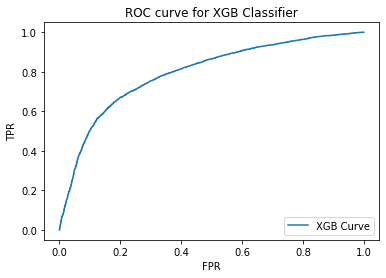

In [27]:
from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print("XGBoost Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,model.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="XGB Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for XGB Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.

**Decision Tree Classifier**

In [28]:
from sklearn.tree import DecisionTreeClassifier
#here we import the 'DecisionTreeClassifier' function from the 'tree' subpackage of sklearn.
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
# Predicting the Test set results 
y_pred = dtc.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
dt = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(dt*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data
  id
36419    0
49300    0
99407    0
81110    0
68122    0
        ..
64071    0
18248    1
35095    0
24193    0
70162    1
Name: cardio, Length: 13996, dtype: int64


Confusion Matrix:
 [[4378 2590]
 [2635 4393]]


Accuracy is  62.67 %
Precision is  0.63
Recall is  0.63


**Plotting the ROC curve for decision tree**

In [32]:
from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])
print("Decision tree Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,dt.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="DT Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for DT Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.

AttributeError: 'numpy.float64' object has no attribute 'predict_proba'

**Linear Perceptron**

In [33]:
from sklearn.linear_model import Perceptron
lp = Perceptron(tol=1e-3, random_state=0)
lp.fit(X_train, y_train)
Perceptron()
lp.score(X_train, y_train)


0.5594319399785638

In [34]:
# Predicting the Test set results 
y_pred = lp.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
lps = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(lps*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data
  id
36419    0
49300    0
99407    0
81110    0
68122    0
        ..
64071    0
18248    1
35095    0
24193    0
70162    1
Name: cardio, Length: 13996, dtype: int64


Confusion Matrix:
 [[6545  423]
 [5748 1280]]


Accuracy is  55.91 %
Precision is  0.75
Recall is  0.18


**Linear SVC**

In [35]:
from sklearn.svm import LinearSVC
ls = LinearSVC(loss="hinge", random_state=42).fit(X_train, y_train)


C:\Users\rpriy\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [36]:
ls.fit(X_train, y_train)

C:\Users\rpriy\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(loss='hinge', random_state=42)

In [37]:
# Predicting the Test set results 
y_pred = ls.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
lss = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(lss*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data
  id
36419    0
49300    0
99407    0
81110    0
68122    0
        ..
64071    0
18248    1
35095    0
24193    0
70162    1
Name: cardio, Length: 13996, dtype: int64


Confusion Matrix:
 [[4821 2147]
 [2818 4210]]


Accuracy is  64.53 %
Precision is  0.66
Recall is  0.6


## KNN Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

In [39]:
y_pred = knn.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
knns = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(knns*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data
  id
36419    0
49300    0
99407    0
81110    0
68122    0
        ..
64071    0
18248    1
35095    0
24193    0
70162    1
Name: cardio, Length: 13996, dtype: int64


Confusion Matrix:
 [[4269 2699]
 [2805 4223]]


Accuracy is  60.67 %
Precision is  0.61
Recall is  0.6


KNN Area Under the Curve = 0.6368367762344096


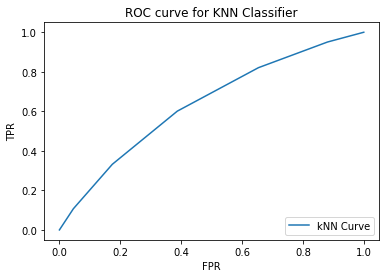

In [40]:
from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
print("KNN Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,knn.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="kNN Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for KNN Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.

## Random Forest

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfc = DecisionTreeClassifier().fit(X_train, y_train)


# Predicting the Test set results 
y_pred = rfc.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
rf = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(rf*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data
  id
36419    0
49300    0
99407    0
81110    0
68122    0
        ..
90449    0
23438    0
74822    0
6988     1
72841    1
Name: cardio, Length: 17494, dtype: int64


Confusion Matrix:
 [[5561 3131]
 [3294 5508]]


Accuracy is  63.27 %
Precision is  0.64
Recall is  0.63


Random Forest Area Under the Curve = 0.6327537627153097


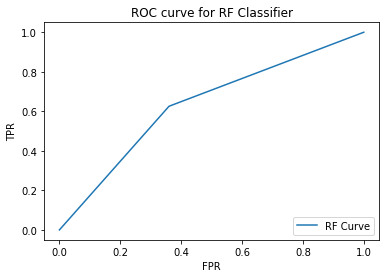

In [43]:
from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
print("Random Forest Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,rfc.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="RF Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for RF Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.

## SVM RBF Model

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf').fit(X_train,y_train)

In [46]:
y_pred = svc.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
svrb= accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(svrb*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

The actual testing data
  id
36419    0
49300    0
99407    0
81110    0
68122    0
        ..
64071    0
18248    1
35095    0
24193    0
70162    1
Name: cardio, Length: 13996, dtype: int64


Confusion Matrix:
 [[4496 2472]
 [3143 3885]]


Accuracy is  59.88 %
Precision is  0.61
Recall is  0.55


# GaussianNB Classifier

The actual testing data:
  id
36419    0
49300    0
99407    0
81110    0
68122    0
        ..
64071    0
18248    1
35095    0
24193    0
70162    1
Name: cardio, Length: 13996, dtype: int64


Confusion Matrix:
 [[6159  809]
 [4953 2075]]


Accuracy is  58.83 %
Precision is  0.72
Recall is  0.3

 Classification Report
              precision    recall  f1-score   support

           0       0.55      0.88      0.68      6968
           1       0.72      0.30      0.42      7028

    accuracy                           0.59     13996
   macro avg       0.64      0.59      0.55     13996
weighted avg       0.64      0.59      0.55     13996

GausianNB Area Under the Curve = 0.6900221914539644


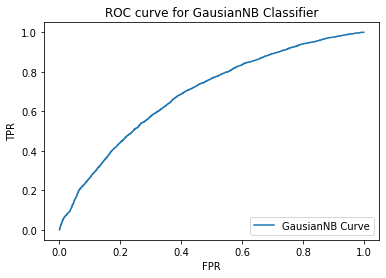

In [47]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB() 
clf.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = clf.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

#Classification Report
print('\n Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Plotting the ROC curve
from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
print("GausianNB Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,clf.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="GausianNB Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for GausianNB Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.

**Comparing Accuracies of different Models**

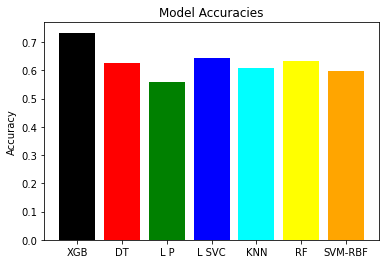

In [48]:
x='XGB'
y='DT'
j='L P'
k='L SVC'
l='KNN'
m='RF'
n='SVM-RBF'

c=[x,y,j,k,l,m,n] 
d=[xgb,dt,lps,lss,knns,rf,svrb] 
plt.bar(c,d,color=['black', 'red', 'green', 'blue', 'cyan','yellow','orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

In [49]:
print(d)

[0.7332809374106888, 0.6266790511574736, 0.5590883109459845, 0.6452557873678194, 0.606744784224064, 0.6327312221333028, 0.5988139468419549]
